In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
data_molinetes = pd.read_csv('/content/drive/MyDrive/AP/historico-2022.csv')
data_molinetes

,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,pax_pagos,pax_pases_pagos,pax_franq,pax_TOTAL
0,1/4/2022,05:15:00,05:30:00,LineaA,LineaA_Congreso_N_Turn01,Congreso,0,0,1,1.0
1,1/4/2022,05:15:00,05:30:00,LineaA,LineaA_Flores_Este_Turn03,Flores,1,0,0,1.0
2,1/4/2022,05:15:00,05:30:00,LineaA,LineaA_Pasco_Turn01,Pasco,0,0,1,1.0
3,1/4/2022,05:15:00,05:30:00,LineaA,LineaA_SanPedrito_Este_Turn04,San Pedrito,2,0,0,2.0
4,1/4/2022,05:15:00,05:30:00,LineaA,LineaA_SanPedrito_Oeste_Turn02,San Pedrito,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
2468473,31/5/2022,23:30:00,23:45:00,LineaH,LineaH_Caseros_Sur_Turn02,Caseros,0,0,1,1.0
2468474,31/5/2022,23:30:00,23:45:00,LineaH,LineaH_Hospitales_Sur_Turn03,Hospitales,1,0,0,1.0
2468475,31/5/2022,23:30:00,23:45:00,LineaH,LineaH_Once_Sur_Turn04,Once,1,0,0,1.0
2468476,31/5/2022,23:30:00,23:45:00,LineaH,LineaH_Cordoba_Turn01,Cordoba,1,0,0,1.0


In [11]:
data_molinetes = data_molinetes.drop(columns=['pax_pagos','pax_pases_pagos','pax_franq'])

In [12]:
data_molinetes[data_molinetes['ESTACION']== 'Lima']

,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,pax_TOTAL
19,1/4/2022,05:15:00,05:30:00,LineaA,LineaA_Lima_S_Turn03,Lima,20.0
50,1/4/2022,05:15:00,05:30:00,LineaA,LineaA_Lima_S_Turn02,Lima,16.0
123,1/4/2022,05:15:00,05:30:00,LineaA,LineaA_Lima_S_Turn01,Lima,18.0
143,1/4/2022,05:30:00,05:45:00,LineaA,LineaA_Lima_S_Turn03,Lima,43.0
198,1/4/2022,05:30:00,05:45:00,LineaA,LineaA_Lima_S_Turn02,Lima,24.0
...,...,...,...,...,...,...,...
2024734,31/5/2022,23:00:00,23:15:00,LineaA,LineaA_Lima_S_Turn03,Lima,8.0
2024782,31/5/2022,23:15:00,23:30:00,LineaA,LineaA_Lima_N_Turn02,Lima,1.0
2024783,31/5/2022,23:15:00,23:30:00,LineaA,LineaA_Lima_S_Turn01,Lima,1.0
2024796,31/5/2022,23:15:00,23:30:00,LineaA,LineaA_Lima_S_Turn02,Lima,3.0


In [13]:
data_molinetes[data_molinetes['ESTACION']== 'Plaza Miserere']['MOLINETE'].value_counts()

LineaA_Miserere_S_Turn03         4228
LineaA_Miserere_Q_HALL_Turn05    4135
LineaA_Miserere_Q_HALL_Turn04    4077
LineaA_Miserere_S_Turn02         4067
LineaA_Miserere_Q_HALL_Turn03    4035
LineaA_Miserere_Q_HALL_Turn02    3975
LineaA_Miserere_S_Turn01         1716
LineaA_Miserere_Q_HALL_Turn01    1706
LineaA_Miserere_Q_HALL_Turn06    1579
LineaA_Miserere_Q_NE_Turn04       412
LineaA_Miserere_Q_NE_Turn03       228
LineaA_Miserere_Q_NE_Turn02       137
LineaA_Miserere_Q_NE_Turn01         5
Name: MOLINETE, dtype: int64

In [14]:
data_molinetes['fecha']= pd.to_datetime(data_molinetes['FECHA'], format='%d/%m/%Y')

In [15]:
data_molinetes['fecha'].apply(lambda x : x.day)

0           1
1           1
2           1
3           1
4           1
           ..
2468473    31
2468474    31
2468475    31
2468476    31
2468477    31
Name: fecha, Length: 2468478, dtype: int64

In [16]:
data_molinetes['DIADELASEMANA']= data_molinetes['fecha'].apply(lambda x : x.weekday())
data_molinetes['MES']= data_molinetes['fecha'].apply(lambda x : x.month)
data_molinetes['ANO']= data_molinetes['fecha'].apply(lambda x : x.year)
data_molinetes

,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,pax_TOTAL,fecha,DIADELASEMANA,MES,ANO
0,1/4/2022,05:15:00,05:30:00,LineaA,LineaA_Congreso_N_Turn01,Congreso,1.0,2022-04-01,4,4,2022
1,1/4/2022,05:15:00,05:30:00,LineaA,LineaA_Flores_Este_Turn03,Flores,1.0,2022-04-01,4,4,2022
2,1/4/2022,05:15:00,05:30:00,LineaA,LineaA_Pasco_Turn01,Pasco,1.0,2022-04-01,4,4,2022
3,1/4/2022,05:15:00,05:30:00,LineaA,LineaA_SanPedrito_Este_Turn04,San Pedrito,2.0,2022-04-01,4,4,2022
4,1/4/2022,05:15:00,05:30:00,LineaA,LineaA_SanPedrito_Oeste_Turn02,San Pedrito,1.0,2022-04-01,4,4,2022
...,...,...,...,...,...,...,...,...,...,...,...
2468473,31/5/2022,23:30:00,23:45:00,LineaH,LineaH_Caseros_Sur_Turn02,Caseros,1.0,2022-05-31,1,5,2022
2468474,31/5/2022,23:30:00,23:45:00,LineaH,LineaH_Hospitales_Sur_Turn03,Hospitales,1.0,2022-05-31,1,5,2022
2468475,31/5/2022,23:30:00,23:45:00,LineaH,LineaH_Once_Sur_Turn04,Once,1.0,2022-05-31,1,5,2022
2468476,31/5/2022,23:30:00,23:45:00,LineaH,LineaH_Cordoba_Turn01,Cordoba,1.0,2022-05-31,1,5,2022


In [17]:
# Para predecir los datos en 1 hora:
data_molinetes['HORA']= pd.to_datetime(data_molinetes['DESDE'])
data_molinetes['HORA']= data_molinetes['HORA'].apply(lambda x : x.hour)
data_molinetes

,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,pax_TOTAL,fecha,DIADELASEMANA,MES,ANO,HORA
0,1/4/2022,05:15:00,05:30:00,LineaA,LineaA_Congreso_N_Turn01,Congreso,1.0,2022-04-01,4,4,2022,5
1,1/4/2022,05:15:00,05:30:00,LineaA,LineaA_Flores_Este_Turn03,Flores,1.0,2022-04-01,4,4,2022,5
2,1/4/2022,05:15:00,05:30:00,LineaA,LineaA_Pasco_Turn01,Pasco,1.0,2022-04-01,4,4,2022,5
3,1/4/2022,05:15:00,05:30:00,LineaA,LineaA_SanPedrito_Este_Turn04,San Pedrito,2.0,2022-04-01,4,4,2022,5
4,1/4/2022,05:15:00,05:30:00,LineaA,LineaA_SanPedrito_Oeste_Turn02,San Pedrito,1.0,2022-04-01,4,4,2022,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2468473,31/5/2022,23:30:00,23:45:00,LineaH,LineaH_Caseros_Sur_Turn02,Caseros,1.0,2022-05-31,1,5,2022,23
2468474,31/5/2022,23:30:00,23:45:00,LineaH,LineaH_Hospitales_Sur_Turn03,Hospitales,1.0,2022-05-31,1,5,2022,23
2468475,31/5/2022,23:30:00,23:45:00,LineaH,LineaH_Once_Sur_Turn04,Once,1.0,2022-05-31,1,5,2022,23
2468476,31/5/2022,23:30:00,23:45:00,LineaH,LineaH_Cordoba_Turn01,Cordoba,1.0,2022-05-31,1,5,2022,23


In [18]:
data_molinetes = data_molinetes.drop(columns=['FECHA','fecha', 'DESDE','HASTA'])

In [19]:
data_molinetes.to_csv('molinetes_limpio_11321.csv')

In [20]:
data_molinetes.groupby(['DIADELASEMANA'])['pax_TOTAL'].mean()

DIADELASEMANA
0    22.761802
1    23.726617
2    19.950719
3    23.767044
4    22.666632
5    14.063896
6     9.146925
Name: pax_TOTAL, dtype: float64

In [21]:
data_molinetes.groupby(['DIADELASEMANA'])['pax_TOTAL'].sum()

DIADELASEMANA
0    5975747.0
1    6237253.0
2    4034594.0
3    5315951.0
4    5917079.0
5    3129695.0
6    1661237.0
Name: pax_TOTAL, dtype: float64

In [22]:
data_molinetes.groupby(['DIADELASEMANA', 'MES'])['pax_TOTAL'].sum()


DIADELASEMANA  MES
0              4      1832772.0
               5      4142975.0
1              4      1944277.0
               5      4292976.0
2              4      1991153.0
               5      2043441.0
3              4      1699500.0
               5      3616451.0
4              4      2474873.0
               5      3442206.0
5              4      1443900.0
               5      1685795.0
6              4       501700.0
               5      1159537.0
Name: pax_TOTAL, dtype: float64

In [23]:
#Contando los viajes agrupando con los criterios DIADELASEMANA MES Y HORA para predecir la cantidad de pasajeros que pasaron por los molinetes 

data_molinetes.groupby(['DIADELASEMANA', 'MES', 'HORA'])['pax_TOTAL'].sum()

DIADELASEMANA  MES  HORA
0              4    5        12576.0
                    6        63119.0
                    7       149222.0
                    8       165438.0
                    9       128005.0
                              ...   
6              5    18      125283.0
                    19      111376.0
                    20       78348.0
                    21       47980.0
                    22       10184.0
Name: pax_TOTAL, Length: 262, dtype: float64

In [24]:
data_molinetes.head()

,LINEA,MOLINETE,ESTACION,pax_TOTAL,DIADELASEMANA,MES,ANO,HORA
0,LineaA,LineaA_Congreso_N_Turn01,Congreso,1.0,4,4,2022,5
1,LineaA,LineaA_Flores_Este_Turn03,Flores,1.0,4,4,2022,5
2,LineaA,LineaA_Pasco_Turn01,Pasco,1.0,4,4,2022,5
3,LineaA,LineaA_SanPedrito_Este_Turn04,San Pedrito,2.0,4,4,2022,5
4,LineaA,LineaA_SanPedrito_Oeste_Turn02,San Pedrito,1.0,4,4,2022,5


In [46]:
data_l = data_molinetes.drop(columns=['MOLINETE'], axis=1)
data_unificada = data_l.groupby(['LINEA','ESTACION','DIADELASEMANA','MES','ANO','HORA'])['pax_TOTAL'].sum()
data = data_unificada.reset_index()

In [45]:
data_unificada.tail()

LINEA   ESTACION   DIADELASEMANA  MES  ANO   HORA
LineaH  Venezuela  6              5    2022  18      744.0
                                             19      599.0
                                             20      546.0
                                             21      318.0
                                             22       70.0
Name: pax_TOTAL, dtype: float64

In [47]:
data['ESTACION'].unique()

array(['Acoyte', 'Alberti', 'Carabobo', 'Castro Barros', 'Congreso',
       'Flores', 'Lima', 'Loria', 'Pasco', 'Peru', 'Piedras',
       'Plaza Miserere', 'Plaza de Mayo', 'Primera Junta', 'Puan',
       'Rio de Janeiro', 'Saenz Peña ', 'San Pedrito', 'Angel Gallardo',
       'Callao.B', 'Carlos Gardel', 'Carlos Pellegrini', 'Dorrego',
       'Echeverria', 'Federico Lacroze', 'Florida', 'Leandro N. Alem',
       'Los Incas', 'Malabia', 'Medrano', 'Pasteur', 'Pueyrredon',
       'Rosas', 'Tronador', 'Uruguay', 'Avenida de Mayo', 'Constitucion',
       'Diagonal Norte', 'General San Martin', 'Independencia', 'Lavalle',
       'Mariano Moreno', 'Retiro', 'San Juan', '9 de julio', 'AgÃ¼ero',
       'Agüero', 'Bulnes', 'Callao', 'Catedral', 'Congreso de Tucuman',
       'Facultad de Medicina', 'Jose Hernandez', 'Juramento',
       'Ministro Carranza', 'Olleros', 'Palermo', 'Plaza Italia',
       'Pueyrredon.D', 'Scalabrini Ortiz', 'Tribunales',
       'Avenida La Plata', 'Boedo', 'Bolivar'

In [48]:
data.to_csv('data_2022.csv')

In [49]:
data.head()

,LINEA,ESTACION,DIADELASEMANA,MES,ANO,HORA,pax_TOTAL
0,LineaA,Acoyte,0,4,2022,5,128.0
1,LineaA,Acoyte,0,4,2022,6,985.0
2,LineaA,Acoyte,0,4,2022,7,3681.0
3,LineaA,Acoyte,0,4,2022,8,4223.0
4,LineaA,Acoyte,0,4,2022,9,3524.0


In [50]:
data = data.drop(columns = ['LINEA'])

In [51]:
data = pd.get_dummies(data, drop_first= True)

In [53]:
data

,DIADELASEMANA,MES,ANO,HORA,pax_TOTAL,ESTACION_Acoyte,ESTACION_AgÃ¼ero,ESTACION_Agüero,ESTACION_Alberti,ESTACION_Angel Gallardo,...,ESTACION_San Juan,ESTACION_San Pedrito,ESTACION_Santa Fe,ESTACION_Scalabrini Ortiz,ESTACION_Tribunales,ESTACION_Tronador,ESTACION_Urquiza,ESTACION_Uruguay,ESTACION_Varela,ESTACION_Venezuela
0,0,4,2022,5,128.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,4,2022,6,985.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,4,2022,7,3681.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,4,2022,8,4223.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4,2022,9,3524.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23467,6,5,2022,18,744.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23468,6,5,2022,19,599.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23469,6,5,2022,20,546.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23470,6,5,2022,21,318.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
#Aca iniciamos un modelo de arból de desiciones, importamos el modelo y tomamos la variable a predecir que es pax_TOTAL (la cantidad de pasajeros)

from sklearn.model_selection import train_test_split
X = data.drop(columns = ['pax_TOTAL'])
y = data['pax_TOTAL'] 

In [55]:
#Creamos el arbol

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=138)  #por default 25% de test
from sklearn.tree import DecisionTreeRegressor
arbol = DecisionTreeRegressor()

In [56]:
arbol.fit(X_train, y_train)

DecisionTreeRegressor()

In [57]:
from sklearn.metrics import mean_squared_error 

In [58]:
#Predecimos 'y'
y_pred = arbol.predict(X_train)

In [59]:
#Da 0, por lo que hizo over fitting, es decir que esta memorizando los datos que no puede finalizar 
mean_squared_error(y_train, y_pred, squared= False)

0.0

In [62]:
y_pred_test = arbol.predict(X_test)

In [63]:
mean_squared_error(y_test, y_pred_test, squared= False)

551.6954457490646

In [90]:
# Aca hacemos un limite de preguntas para que el modelo dé valores razonables de pasajeros 
arbol_2 = DecisionTreeRegressor(max_depth= 15)
arbol_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15)

In [91]:
y_pred = arbol_2.predict(X_train)
mean_squared_error(y_train, y_pred, squared= False)

903.9532806536458

In [92]:
y_pred_test = arbol_2.predict(X_test)

In [93]:
mean_squared_error(y_test, y_pred_test, squared= False)

1048.3661050425892

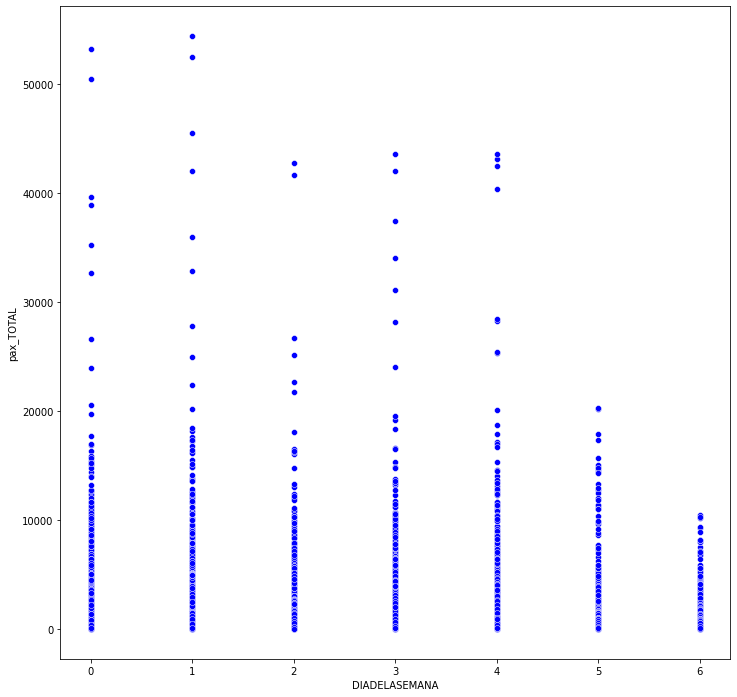

In [105]:
#Tomando la cantidad de pasajeros (eje y) con los dias de la semana (siendo lunes = 0), hacemos una regresion lineal simple
from sklearn.linear_model import LinearRegression
import numpy as np
plt.figure(figsize = (12, 12))
sns.scatterplot(data = data, x = 'DIADELASEMANA', y= 'pax_TOTAL', color = 'b')

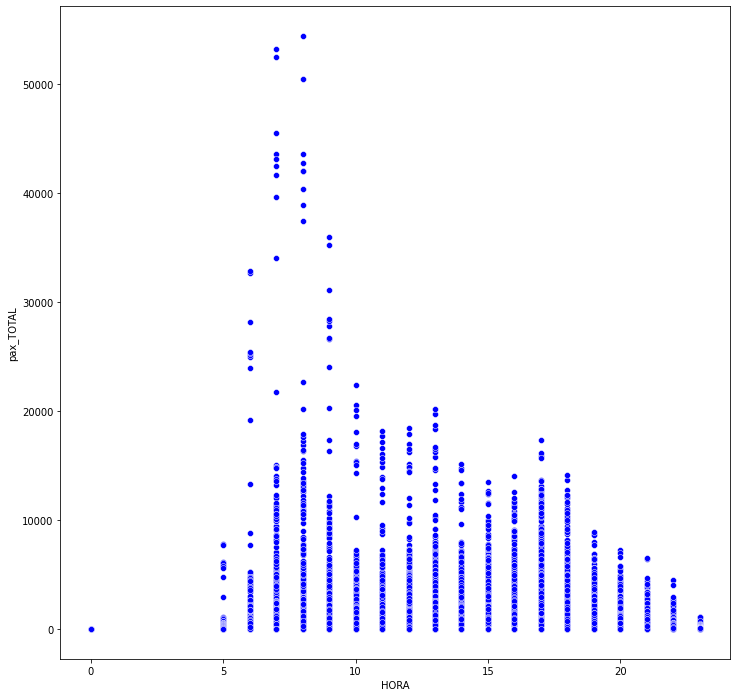

In [103]:
plt.figure(figsize = (12, 12))
sns.scatterplot(data = data, x = 'HORA', y= 'pax_TOTAL', color = 'b')

In [107]:
grafico_rl = LinearRegression()
grafico_rl.fit(X_train, y_train)

LinearRegression()

In [110]:
y_pred_train = grafico_rl.predict(X_train)

In [115]:
mean_squared_error(y_train, y_pred_train, squared=False)

1757.5654893268963

In [117]:
y_pred_test = grafico_rl.predict(X_test)
mean_squared_error(y_test, y_pred_test, squared=False)

1792.4093378248579

In [120]:
y_train.mean()

1363.3319132015451